In [40]:
import geopandas as gpd

# Carrega o shapefile de risco de ocorrência de desastres naturais
gdf = gpd.read_file('../dados/ocorrencias/SIRGAS_SHP_riscoocorrencia_2024.shp')

<Axes: >

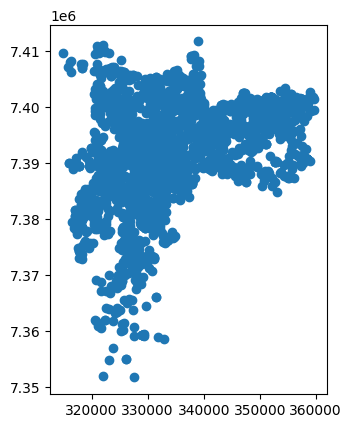

In [41]:
gdf.plot()

In [42]:
gdf.head()

,data,ocorrencia,subpreit,name,geometry
0,2024-02-01,QUEDA DE ARVORE,PE - PENHA,32058922,POINT (348028.065 7396363.589)
1,2024-02-01,QUEDA DE ARVORE,SM - SAO MATEUS,32059098,POINT (348237.381 7387915.75)
2,2024-02-01,QUEDA DE ARVORE,MO - MOOCA,32059213,POINT (338444.072 7392775.387)
3,2024-02-01,QUEDA DE ARVORE,IP - IPIRANGA,32059319,POINT (336737.553 7386230.586)
4,2024-02-01,QUEDA DE ARVORE,CL - CAMPO LIMPO,32059352,POINT (323516.263 7385823.214)


In [43]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        2514 non-null   datetime64[ms]
 1   ocorrencia  2514 non-null   object        
 2   subpreit    2514 non-null   object        
 3   name        2514 non-null   object        
 4   geometry    2514 non-null   geometry      
dtypes: datetime64[ms](1), geometry(1), object(3)
memory usage: 98.3+ KB


In [44]:
gdf_novo = gdf.copy()

In [45]:
gdf_novo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        2514 non-null   datetime64[ms]
 1   ocorrencia  2514 non-null   object        
 2   subpreit    2514 non-null   object        
 3   name        2514 non-null   object        
 4   geometry    2514 non-null   geometry      
dtypes: datetime64[ms](1), geometry(1), object(3)
memory usage: 98.3+ KB


In [46]:
gdf_novo['geometry'] = gdf_novo['geometry'].astype(str)

C:\Users\prado\AppData\Local\Temp\ipykernel_26392\3055552666.py:1: UserWarning: Geometry column does not contain geometry.
  gdf_novo['geometry'] = gdf_novo['geometry'].astype(str)


In [47]:
import pandas as pd
from pyproj import Proj
import re

# Definindo o sistema de coordenadas UTM zona 23S
utm_proj = Proj(proj='utm', zone=23, south=True, ellps='WGS84')

# Função para extrair coordenadas e converter para latitude/longitude
def utm_para_latlon(geometry):
    match = re.match(r'POINT \((\d+\.\d+) (\d+\.\d+)\)', geometry)
    if match:
        easting = float(match.group(1))
        northing = float(match.group(2))
        lon, lat = utm_proj(easting, northing, inverse=True)
        return lat, lon

# Aplicar a função para criar as novas colunas 'Latitude' e 'Longitude'
gdf_novo['Latitude'], gdf_novo['Longitude'] = zip(*gdf_novo['geometry'].apply(utm_para_latlon))

# Exibindo o DataFrame atualizado
gdf_novo

,data,ocorrencia,subpreit,name,geometry,Latitude,Longitude
0,2024-02-01,QUEDA DE ARVORE,PE - PENHA,32058922,POINT (348028.065087 7396363.5887),-23.535919,-46.488748
1,2024-02-01,QUEDA DE ARVORE,SM - SAO MATEUS,32059098,POINT (348237.381311 7387915.750126),-23.612220,-46.487557
2,2024-02-01,QUEDA DE ARVORE,MO - MOOCA,32059213,POINT (338444.071646 7392775.386647),-23.567392,-46.582996
3,2024-02-01,QUEDA DE ARVORE,IP - IPIRANGA,32059319,POINT (336737.553416 7386230.585671),-23.626315,-46.600429
4,2024-02-01,QUEDA DE ARVORE,CL - CAMPO LIMPO,32059352,POINT (323516.262782 7385823.214009),-23.628602,-46.730039
...,...,...,...,...,...,...,...
2509,2024-01-31,ALAGAMENTO,SB - SAPOPEMBA,32057914,POINT (347483.631646 7386553.451906),-23.624450,-46.495083
2510,2024-01-31,QUEDA DE ARVORE,IQ - ITAQUERA,32058056,POINT (354127.125688 7394828.6609),-23.550340,-46.429165
2511,2024-01-31,INUNDACAO,CS - CAPELA DO SOCORRO,32058336,POINT (328375.102682 7375680.958842),-23.720698,-46.683598
2512,2024-01-31,QUEDA DE ARVORE,BT - BUTANTA,32058368,POINT (324562.933229 7390714.964635),-23.584550,-46.719206


In [52]:
import folium
from folium.plugins import MarkerCluster

# Criando um mapa inicial com as coordenadas de SP
map = folium.Map(location=[-23.5505, -46.6333], zoom_start=10)

# Adicionando um marcador ao mapa
marker_cluster = MarkerCluster().add_to(map)

# Iterando pelas Lat/Lon para adicionar ao mapa
folium.Marker(
    location=[-23.626315, -46.600429], popup=['ESTAB_SA']).add_to(map)
map